<a href="https://colab.research.google.com/github/Rainniee/Neural-Networks-AI/blob/master/Part_1_1_Cifar10_MLP_(epochs_%26_batch_size).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Original Model For Cifar_10 MLP

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

from keras.datasets import cifar10

Using TensorFlow backend.





```
The following configuration used to build the model:

1. No of epochs: 10
2. Batch size: 128
3. Network configuration
    i. Number of neurons in a layer: 512
    ii. Number of layers: 3
4. Learning rate: 0.001
5. Activation functions: relu
6. Dropout rates: 0.2
```



In [0]:
batch_size = 128
num_classes = 10
epochs = 10

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(-1, 3072)
x_test = x_test.reshape(-1, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 45s 0us/step
50000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [0]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 107us/step - loss: 2.1971 - acc: 0.2475 - val_loss: 1.8578 - val_acc: 0.3230
Epoch 2/10
50000/50000 [==============================] - 3s 64us/step - loss: 1.8551 - acc: 0.3295 - val_loss: 1.7897 - val_acc: 0.3364
Epoch 3/10
50000/50000 [==============================] - 3s 64us/step - loss: 1.7790 - acc: 0.3616 - val_loss: 1.6973 - val_acc: 0.3998
Epoch 4/10
50000/50000 [==============================] - 3s 63us/step - loss: 1.7311 - acc: 0.3800 - val_loss: 1.6578 - val_acc: 0.4132
Epoch 5/10
50000/50000 [==============================] - 3s 63us/step - loss: 1.6920 - acc: 0.3956 - val_loss: 1.6559 - val_acc: 0.4062
Epoch 6/10
50000/50000 [==============================] - 3s 63us/step - loss: 1.6601 - acc: 0.4051 - val_loss: 1.5752 - val_acc: 0.4379
Epoch 7/10
50000/50000 [==============================] - 3s 62us/step - loss: 1.6456 - acc: 0.4116 - val_loss: 1.5906 - val_ac

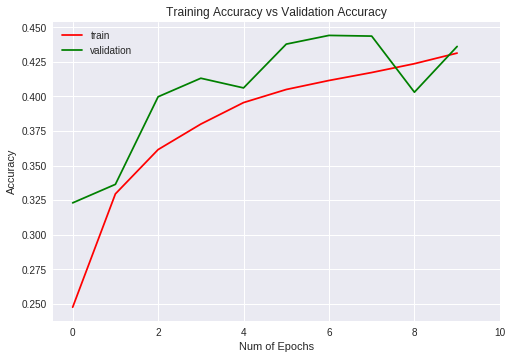

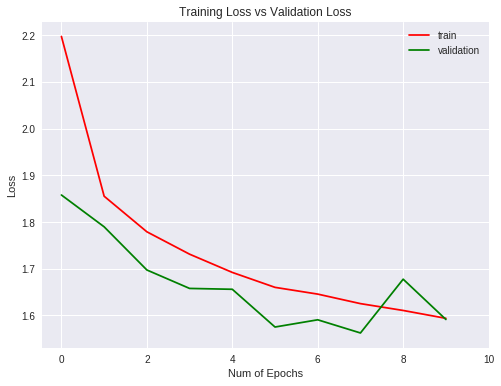

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 12, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 12, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show() 

### Modifying Model For Cifar_10 MLP

***1.1 Modify the empochs number from 10 to 20***

In [0]:
batch_size = 128
num_classes = 10
epochs = 20

In [11]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(-1, 3072)
x_test = x_test.reshape(-1, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [12]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [0]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 70us/step - loss: 2.1850 - acc: 0.2509 - val_loss: 1.8535 - val_acc: 0.3071
Epoch 2/20
50000/50000 [==============================] - 3s 65us/step - loss: 1.8593 - acc: 0.3308 - val_loss: 1.7973 - val_acc: 0.3411
Epoch 3/20
50000/50000 [==============================] - 3s 64us/step - loss: 1.7853 - acc: 0.3565 - val_loss: 1.7144 - val_acc: 0.3808
Epoch 4/20
50000/50000 [==============================] - 3s 64us/step - loss: 1.7367 - acc: 0.3738 - val_loss: 1.6635 - val_acc: 0.4095
Epoch 5/20
50000/50000 [==============================] - 3s 64us/step - loss: 1.7027 - acc: 0.3890 - val_loss: 1.6728 - val_acc: 0.4055
Epoch 6/20
50000/50000 [==============================] - 3s 64us/step - loss: 1.6760 - acc: 0.3981 - val_loss: 1.6467 - val_acc: 0.4014
Epoch 7/20
50000/50000 [==============================] - 3s 64us/step - loss: 1.6539 - acc: 0.4062 - val_loss: 1.6243 - val_acc

***1.2 Modify the empochs number from 20 to 40***

In [0]:
batch_size = 128
num_classes = 10
epochs = 40

In [16]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(-1, 3072)
x_test = x_test.reshape(-1, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [17]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [18]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 4s 72us/step - loss: 2.1531 - acc: 0.2474 - val_loss: 1.8684 - val_acc: 0.3079
Epoch 2/40
50000/50000 [==============================] - 3s 65us/step - loss: 1.8577 - acc: 0.3290 - val_loss: 1.8018 - val_acc: 0.3517
Epoch 3/40
50000/50000 [==============================] - 3s 64us/step - loss: 1.7869 - acc: 0.3585 - val_loss: 1.7184 - val_acc: 0.3813
Epoch 4/40
50000/50000 [==============================] - 3s 64us/step - loss: 1.7439 - acc: 0.3756 - val_loss: 1.6732 - val_acc: 0.4125
Epoch 5/40
50000/50000 [==============================] - 3s 64us/step - loss: 1.7077 - acc: 0.3874 - val_loss: 1.6429 - val_acc: 0.4260
Epoch 6/40
50000/50000 [==============================] - 3s 64us/step - loss: 1.6789 - acc: 0.3992 - val_loss: 1.6458 - val_acc: 0.4186
Epoch 7/40
50000/50000 [==============================] - 3s 64us/step - loss: 1.6551 - acc: 0.4078 - val_loss: 1.5951 - val_acc


**Modified Results:**
```
**The accuracy increased with the epochs increased.**
**The loss decreased with the epochs increased.**
**There is a positive effect within the epochs number and the model performance.**
```





```
```



***2.1 Modify the batch size from 128 to 32***

In [0]:
batch_size = 32
num_classes = 10
epochs = 10

In [25]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(-1, 3072)
x_test = x_test.reshape(-1, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [26]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 224us/step - loss: 2.0327 - acc: 0.2665 - val_loss: 1.8921 - val_acc: 0.3320
Epoch 2/10
50000/50000 [==============================] - 11s 217us/step - loss: 1.8657 - acc: 0.3232 - val_loss: 1.7853 - val_acc: 0.3563
Epoch 3/10
50000/50000 [==============================] - 11s 218us/step - loss: 1.8215 - acc: 0.3418 - val_loss: 1.7417 - val_acc: 0.3731
Epoch 4/10
50000/50000 [==============================] - 11s 217us/step - loss: 1.8051 - acc: 0.3477 - val_loss: 1.8135 - val_acc: 0.3564
Epoch 5/10
50000/50000 [==============================] - 11s 217us/step - loss: 1.7939 - acc: 0.3561 - val_loss: 1.6960 - val_acc: 0.3862
Epoch 6/10
50000/50000 [==============================] - 11s 217us/step - loss: 1.7889 - acc: 0.3580 - val_loss: 1.7046 - val_acc: 0.3983
Epoch 7/10
50000/50000 [==============================] - 11s 216us/step - loss: 1.7841 - acc: 0.3608 - val_loss: 1.

***2.2 Modify the batch size from 128 to 256***

In [0]:
batch_size = 256
num_classes = 10
epochs = 10

In [29]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(-1, 3072)
x_test = x_test.reshape(-1, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [30]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 48us/step - loss: 2.5241 - acc: 0.2217 - val_loss: 2.0383 - val_acc: 0.2668
Epoch 2/10
50000/50000 [==============================] - 2s 39us/step - loss: 1.9131 - acc: 0.3072 - val_loss: 1.8559 - val_acc: 0.3193
Epoch 3/10
50000/50000 [==============================] - 2s 38us/step - loss: 1.8354 - acc: 0.3357 - val_loss: 1.7894 - val_acc: 0.3544
Epoch 4/10
50000/50000 [==============================] - 2s 38us/step - loss: 1.7729 - acc: 0.3615 - val_loss: 1.7867 - val_acc: 0.3410
Epoch 5/10
50000/50000 [==============================] - 2s 39us/step - loss: 1.7387 - acc: 0.3752 - val_loss: 1.7683 - val_acc: 0.3716
Epoch 6/10
50000/50000 [==============================] - 2s 38us/step - loss: 1.7000 - acc: 0.3916 - val_loss: 1.7073 - val_acc: 0.3830
Epoch 7/10
50000/50000 [==============================] - 2s 38us/step - loss: 1.6703 - acc: 0.4002 - val_loss: 1.6822 - val_acc


**Modified Results:**
```
**The accuracy decreased with the epochs increased from 128 to 256 and also decreased from 128 to 32.**
**The loss increased with the epochs increased from 128 to 256 and also decreased from 128 to 32.**
**It seems that epochs = 128 is a good choice for the model performance.**
```
